# Bike Sharing Demand Prediction using Linear Regression

**Aim**:To predict the daily number of bike rentals using temporal, seasonal, and weather-related features, so that bike rental companies can better understand demand patterns and make informed decisions about inventory, staffing, and operational planning

**Introduction**

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

**Load Dataset**

In [4]:
df=pd.read_csv("day.csv")

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [7]:
df.drop(['instant','dteday','casual','registered'],axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [9]:
df.shape

(731, 16)

df.describe()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Define features and target**

In [13]:
X=df.drop('cnt',axis=1)

In [14]:
y=df['cnt']

**Split Data**

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Separate the categorical and numeric columns**

In [16]:
categorical_cols = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr']
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']

**One-Hot Encode Categorical Columns**

In [17]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_cat  = encoder.transform(X_test[categorical_cols]).toarray()


**Scale Numeric Columns**

In [18]:
scaler= StandardScaler()
X_train_num=scaler.fit_transform(X_train[numeric_cols])
X_test_num=scaler.transform(X_test[numeric_cols])

**Combine Encoded + Scaled Features** 

In [19]:
X_train_prepared = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_prepared  = np.concatenate([X_test_cat, X_test_num], axis=1)

**Train Linear Regression model**

In [20]:
reg=LinearRegression()
reg.fit(X_train_prepared, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred=reg.predict(X_test_prepared)

**Evaluation**

In [22]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
msr=mean_squared_error(y_test,y_pred)

In [23]:
print("R2_score is:",r2)
print("Mean absolute error is:",mae)
print("Mean squared error is:",msr)

R2_score is: 0.8418029967286178
Mean absolute error is: 583.0197588300691
Mean squared error is: 634351.3615248953


**Visualization**

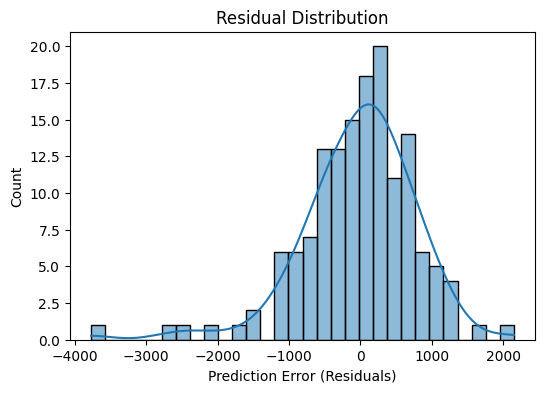

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.show()

**Conclusion**